# **Program 1**

In [5]:
import numpy as np

# User input for weights and threshold
weights = list(map(float, input("Enter weights (space-separated, e.g., '1 1'): ").split()))
threshold = float(input("Enter threshold (e.g., '1.5'): "))

# User input for inputs and expected outputs
n_inputs = int(input("Enter number of input-output pairs (e.g., '4'): "))
inputs = []
expected_outputs = []

print("Provide input-output pairs (e.g., '0 0 0' for input [0, 0] and output 0):")
for _ in range(n_inputs):
    pair = list(map(int, input("Enter input vector followed by expected output: ").split()))
    inputs.append(pair[:-1])
    expected_outputs.append(pair[-1])

inputs = np.array(inputs)
expected_outputs = np.array(expected_outputs)

# McCulloch-Pitts Perceptron Function
def perceptron(x, weights, threshold):
    # Calculate weighted sum
    weighted_sum = np.dot(x, weights)
    # Apply threshold
    return 1 if weighted_sum >= threshold else 0

# Test the Perceptron on each input and print results
print("\nPerceptron Model Results:")
for i in range(len(inputs)):
    output = perceptron(inputs[i], weights, threshold)
    print(f"Input: {inputs[i]} -> Output: {output} (Expected: {expected_outputs[i]})")


Enter weights (space-separated, e.g., '1 1'):  1 1
Enter threshold (e.g., '1.5'):  1.5
Enter number of input-output pairs (e.g., '4'):  4


Provide input-output pairs (e.g., '0 0 0' for input [0, 0] and output 0):


Enter input vector followed by expected output:  0 0 0
Enter input vector followed by expected output:  0 1 0
Enter input vector followed by expected output:  1 0 0
Enter input vector followed by expected output:  1 1 1



Perceptron Model Results:
Input: [0 0] -> Output: 0 (Expected: 0)
Input: [0 1] -> Output: 0 (Expected: 0)
Input: [1 0] -> Output: 0 (Expected: 0)
Input: [1 1] -> Output: 1 (Expected: 1)


# **Program 2**

In [21]:
import numpy as np

# Inputs and step function
INPUTS = np.array([[1, 1], [1, -1], [-1, 1], [-1, -1]])

def step_function(sum): return 1 if sum >= 0 else -1

def calculate_output(weights, instance, bias): return step_function(np.dot(instance, weights) + bias)

# Hebbian Learning Algorithm
def hebb(outputs):
    weights, bias = np.zeros(2), 0  # Initialize weights and bias
    for i in range(len(outputs)):
        weights += INPUTS[i] * outputs[i]
        bias += outputs[i]
    return weights, bias

# Train, test, and print results for both AND and OR gates
def train_and_print(gate_name, outputs):
    weights, bias = hebb(outputs)
    print(f"\n{gate_name.upper()} Gate:")
    for input_vec in INPUTS:
        output = calculate_output(weights, input_vec, bias)
        print(f"Input: {input_vec}, Output: {output}")

# AND and OR gate outputs
and_outputs = np.array([1, -1, -1, -1])
or_outputs = np.array([1, 1, 1, -1])

# Print results for both gates
train_and_print("AND", and_outputs)
train_and_print("OR", or_outputs)


AND Gate:
Input: [1 1], Output: 1
Input: [ 1 -1], Output: -1
Input: [-1  1], Output: -1
Input: [-1 -1], Output: -1

OR Gate:
Input: [1 1], Output: 1
Input: [ 1 -1], Output: 1
Input: [-1  1], Output: 1
Input: [-1 -1], Output: -1


# **Program 3**

In [45]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Generate synthetic dataset (100 crabs: shell width, claw size, weight)
np.random.seed(123)  # New seed for better class separation
blue_crabs = np.random.normal([5.4, 3.1, 0.35], 0.4, (50, 3))
orange_crabs = np.random.normal([6.2, 3.6, 0.55], 0.4, (50, 3))
data = np.vstack((blue_crabs, orange_crabs))
labels = np.array([0] * 50 + [1] * 50)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Get user input for the size of the hidden layer
print("Enter the size of the hidden layers (e.g., for [8, 5] enter: 8 5):")
hidden_layer_input = input()
hidden_layer_sizes = tuple(map(int, hidden_layer_input.split()))

# Build and train the Pattern Net (MLP)
model = MLPClassifier(
    hidden_layer_sizes=hidden_layer_sizes,
    activation='relu',
    solver='adam',
    learning_rate_init=0.01,
    max_iter=1000,
    random_state=42
)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Get new crab input from user
print("\nEnter the new crab's features:")
shell_width = float(input("Shell Width: "))
claw_size = float(input("Claw Size: "))
weight = float(input("Weight: "))
new_crab = np.array([[shell_width, claw_size, weight]])

# Predict species for the new crab
prediction = model.predict(new_crab)
species = ["Blue", "Orange"]
print(f"The predicted species for the new crab is: {species[prediction[0]]}")

# # Plot the data points and the new crab prediction
# plt.figure(figsize=(10, 6))

# # Scatter plot of blue crabs
# plt.scatter(data[labels == 0, 0], data[labels == 0, 1], c='blue', label='Blue Crabs')
# # Scatter plot of orange crabs
# plt.scatter(data[labels == 1, 0], data[labels == 1, 1], c='orange', label='Orange Crabs')

# # Plot the new crab prediction
# plt.scatter(new_crab[0, 0], new_crab[0, 1], c='red', marker='x', label='New Crab')

# plt.xlabel('Shell Width')
# plt.ylabel('Claw Size')
# plt.title('Crab Species Prediction')
# plt.legend()
# plt.grid(True)
# plt.show()


Enter the size of the hidden layers (e.g., for [8, 5] enter: 8 5):


 8 5


Test Accuracy: 90.00%

Enter the new crab's features:


Shell Width:  4
Claw Size:  5
Weight:  4


The predicted species for the new crab is: Orange


# **Program 4**

In [8]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Data
X, y = load_wine(return_X_y=True)
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
model = MLPClassifier(hidden_layer_sizes=(10,), activation='relu', solver='sgd', learning_rate_init=0.01, max_iter=1000, random_state=42)

# Training
model.fit(X_train, y_train)

# Evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 100.00%


# **Program 5**

In [9]:
import numpy as np
# Define the function f(x, y)
def func(x, y):
    return x**2 + y**2
# Compute Jacobian (first derivatives)
def compute_jacobian(x, y):
    df_dx = 2 * x  # ∂f/∂x
    df_dy = 2 * y  # ∂f/∂y
    return np.array([df_dx, df_dy])
# Compute Hessian (second derivatives)
def compute_hessian(x, y):
    d2f_dx2 = 2  # ∂²f/∂x²
    d2f_dy2 = 2  # ∂²f/∂y²
    d2f_dxdy = 0  # ∂²f/∂x∂y
    d2f_dydx = 0  # ∂²f/∂y∂x
    return np.array([[d2f_dx2, d2f_dxdy],
                     [d2f_dydx, d2f_dy2]])
# Example values
x_val, y_val = 1.0, 2.0
# Compute Jacobian and Hessian
jacobian = compute_jacobian(x_val, y_val)
hessian = compute_hessian(x_val, y_val)
print("Jacobian:", jacobian)
print("Hessian:\n", hessian)

Jacobian: [2. 4.]
Hessian:
 [[2 0]
 [0 2]]


# **Program 6**

In [15]:
import numpy as np

# Placeholder instructions for user input
#print("Enter your data as a list of points, e.g., [[2, 3], [1, 1], [2, 1]]")
data_input = input("Enter data (X): ")
X = np.array(eval(data_input))  # Convert input string to a NumPy array

#print("Enter your labels as a list, e.g., [1, -1, -1]")
labels_input = input("Enter labels (y): ")
y = np.array(eval(labels_input))  # Convert input string to a NumPy array

# LMS algorithm
w, b, lr = np.zeros(2), 0, 0.01
for _ in range(1000):
    for i in range(len(X)):
        y_pred = np.dot(X[i], w) + b
        error = y[i] - y_pred
        w += lr * error * X[i]
        b += lr * error

# Prediction
pred = np.sign(np.dot(X, w) + b)
print(f"Final Weights: {w}, Bias: {b}, Predictions: {pred}")

Enter data (X):  [[2,3],[2,2],[2,1]]
Enter labels (y):  [1,-1,-1]


Final Weights: [-0.9272611   0.98949668], Bias: -0.46363054907464846, Predictions: [ 1. -1. -1.]


# **Program 7**

In [44]:
import numpy as np
import matplotlib.pyplot as plt

# Simple LSTM cell forward pass (single timestep)
def simple_lstm(x, h_prev, c_prev, Wf, Wi, Wo, Wc, bf, bi, bo, bc):
    z = np.concatenate((x, h_prev))  # Concatenate input and previous hidden state

    f = sigmoid(np.dot(Wf, z) + bf)  # Forget gate
    i = sigmoid(np.dot(Wi, z) + bi)  # Input gate
    o = sigmoid(np.dot(Wo, z) + bo)  # Output gate
    c_tilde = np.tanh(np.dot(Wc, z) + bc)  # Candidate cell state

    c = f * c_prev + i * c_tilde  # New cell state
    h = o * np.tanh(c)  # New hidden state

    return h, c

# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Generate input data: a sine wave
timesteps = 50
x_input = np.sin(np.linspace(0, 2 * np.pi, timesteps))  # Sine wave input
h_prev = np.zeros(1)  # Initial hidden state
c_prev = np.zeros(1)  # Initial cell state

# Random LSTM weights and biases for a single hidden unit
Wf = np.random.randn(1, 2)  # Forget gate weight
Wi = np.random.randn(1, 2)  # Input gate weight
Wo = np.random.randn(1, 2)  # Output gate weight
Wc = np.random.randn(1, 2)  # Candidate cell state weight

bf = np.zeros(1)  # Forget gate bias
bi = np.zeros(1)  # Input gate bias
bo = np.zeros(1)  # Output gate bias
bc = np.zeros(1)  # Cell state bias

# Track hidden states and cell states over time
hidden_states = []
cell_states = []

for t in range(timesteps):
    x = np.array([x_input[t]])  # Current input
    h_prev, c_prev = simple_lstm(x, h_prev, c_prev, Wf, Wi, Wo, Wc, bf, bi, bo, bc)
    hidden_states.append(h_prev)
    cell_states.append(c_prev)
print("hidden State:",h_prev)
print("Cell  State:",c_prev)
# # Convert to numpy arrays for plotting
# hidden_states = np.array(hidden_states).flatten()
# cell_states = np.array(cell_states).flatten()

# # Plot the results
# plt.figure(figsize=(10, 6))
# plt.plot(x_input, label='Input (Sine Wave)', color='blue')
# plt.plot(hidden_states, label='Hidden State (h)', color='orange')
# plt.plot(cell_states, label='Cell State (c)', color='green')
# plt.title('LSTM Forward Pass: Hidden and Cell States Over Time')
# plt.xlabel('Time Steps')
# plt.ylabel('State Values')
# plt.legend()
# plt.grid()
# plt.show()


hidden State: [0.07259194]
Cell  State: [0.14386212]


# **Program 8**

In [29]:
import numpy as np

# Simple RNN parameters
input_size =3
hidden_size = 3
output_size = 2
seq_length = 4

# Random data
X = np.random.randn(seq_length, input_size)
y = np.random.randint(0, output_size, size=(1,))

# Initialize weights and biases
Wh = np.random.randn(hidden_size, hidden_size)
Wx = np.random.randn(input_size, hidden_size)
Wy = np.random.randn(hidden_size, output_size)
bh = np.zeros((1, hidden_size))
by = np.zeros((1, output_size))

# Forward pass
h = np.zeros((1, hidden_size))
for t in range(seq_length):
    h = np.tanh(X[t].dot(Wx) + h.dot(Wh) + bh)  # RNN step
output = h.dot(Wy) + by  # Output layer
pred = np.argmax(output, axis=1)

print(f"Predicted class: {pred}, Actual class: {y}")

Enter the hidden size from 4 to 8 5


Predicted class: [1], Actual class: [1]


# **Program 9**

In [37]:
import numpy as np

# Random 5x5 input and 3x3 kernel
X = np.random.randn(5, 5)
W = np.random.randn(3, 3)

# Accept user input for X (5x5 matrix) and W (3x3 kernel)
#print("Enter the values for the 5x5 input matrix X, row by row (separate values by space):")
#X = np.array([list(map(float, input(f"Enter row {i+1} of X: ").split())) for i in range(5)])

#print("\nEnter the values for the 3x3 kernel matrix W, row by row (separate values by space):")
#W = np.array([list(map(float, input(f"Enter row {i+1} of W: ").split())) for i in range(3)])


# Convolution operation (without padding, stride = 1)
conv_out = np.array([[np.sum(X[i:i+3, j:j+3] * W) for j in range(3)] for i in range(3)])

# ReLU activation
relu_out = np.maximum(0, conv_out)

# Max pooling (2x2)
pool_out = np.max(relu_out[:2, :2])

print("Convolution Output:\n", conv_out)
print("ReLU Output:\n", relu_out)
print("Max Pooling Output:", pool_out)

# # Plot the results
# fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# # Plot input matrix X
# axes[0].imshow(X, cmap='gray', interpolation='none')
# axes[0].set_title('Input Matrix (X)')
# axes[0].axis('off')

# # Plot kernel matrix W
# axes[1].imshow(W, cmap='gray', interpolation='none')
# axes[1].set_title('Kernel (W)')
# axes[1].axis('off')

# # Plot Convolution Output
# axes[2].imshow(conv_out, cmap='hot', interpolation='none')
# axes[2].set_title('Convolution Output')
# axes[2].axis('off')

# # Plot ReLU Output
# axes[3].imshow(relu_out, cmap='hot', interpolation='none')
# axes[3].set_title('ReLU Output')
# axes[3].axis('off')

# plt.tight_layout()
# plt.show()  

Convolution Output:
 [[-0.20130147 -1.26149304 -2.30948117]
 [-1.34392691  1.39415836 -2.23618986]
 [ 0.45686063  1.84257879 -2.91646302]]
ReLU Output:
 [[0.         0.         0.        ]
 [0.         1.39415836 0.        ]
 [0.45686063 1.84257879 0.        ]]
Max Pooling Output: 1.3941583594129172


# **Program 10**

Input Vector (X): [ 0.5 -0.2  0.1]
Previous Hidden State (h_prev): [0. 0.]
Update Gate (z): [0.32166366 0.4047607 ]
Reset Gate (r): [0.35521032 0.47167561]
Candidate Hidden State (h_tilde): [ 0.50420154 -0.59937855]
New Hidden State (h): [ 0.16218332 -0.24260488]


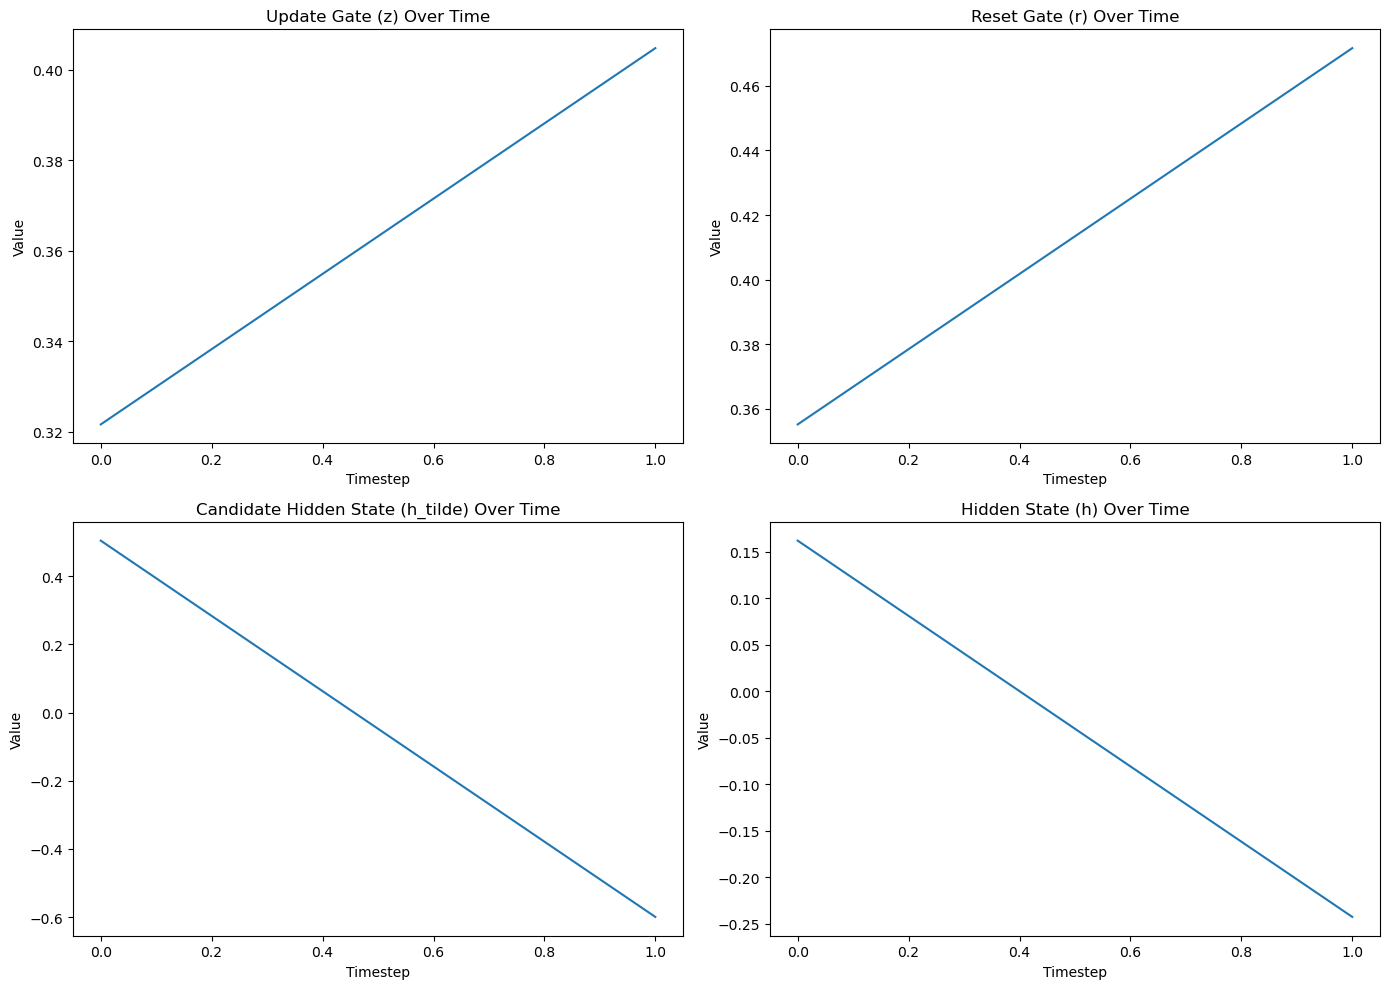

In [41]:
import numpy as np

# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))  # Sigmoid function

# GRU parameters (random initialization)
input_size = 3  # Size of input vector
hidden_size = 2  # Size of hidden state

# Define the input and previous hidden state
X = np.array([0.5, -0.2, 0.1])  # Example input vector (3-dimensional)
h_prev = np.array([0.0, 0.0])   # Initial hidden state (2-dimensional)

# Random weights and biases
Wz = np.random.randn(input_size, hidden_size)  # Update gate weights
Wr = np.random.randn(input_size, hidden_size)  # Reset gate weights
Wh = np.random.randn(input_size, hidden_size)  # Candidate hidden state weights
Uz = np.random.randn(hidden_size, hidden_size)  # Update gate recurrent weights
Ur = np.random.randn(hidden_size, hidden_size)  # Reset gate recurrent weights
Uh = np.random.randn(hidden_size, hidden_size)  # Candidate hidden state recurrent weights
bz = np.zeros(hidden_size)  # Bias for update gate
br = np.zeros(hidden_size)  # Bias for reset gate
bh = np.zeros(hidden_size)  # Bias for candidate hidden state

# GRU operations (single step)
z = sigmoid(X.dot(Wz) + h_prev.dot(Uz) + bz)  # Update gate
r = sigmoid(X.dot(Wr) + h_prev.dot(Ur) + br)  # Reset gate
h_tilde = np.tanh(X.dot(Wh) + (r * h_prev).dot(Uh) + bh)  # Candidate hidden state
h = (1 - z) * h_prev + z * h_tilde  # New hidden state

# Print input, output, and hidden state update
print("Input Vector (X):", X)
print("Previous Hidden State (h_prev):", h_prev)
print("Update Gate (z):", z)
print("Reset Gate (r):", r)
print("Candidate Hidden State (h_tilde):", h_tilde)
print("New Hidden State (h):", h)


# # Plot the results
# fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# # Plot Update Gate (z)
# axes[0, 0].plot(z)
# axes[0, 0].set_title('Update Gate (z) Over Time')
# axes[0, 0].set_xlabel('Timestep')
# axes[0, 0].set_ylabel('Value')

# # Plot Reset Gate (r)
# axes[0, 1].plot(r)
# axes[0, 1].set_title('Reset Gate (r) Over Time')
# axes[0, 1].set_xlabel('Timestep')
# axes[0, 1].set_ylabel('Value')

# # Plot Candidate Hidden State (h_tilde)
# axes[1, 0].plot(h_tilde)
# axes[1, 0].set_title('Candidate Hidden State (h_tilde) Over Time')
# axes[1, 0].set_xlabel('Timestep')
# axes[1, 0].set_ylabel('Value')

# # Plot Hidden State (h)
# axes[1, 1].plot(h)
# axes[1, 1].set_title('Hidden State (h) Over Time')
# axes[1, 1].set_xlabel('Timestep')
# axes[1, 1].set_ylabel('Value')

# plt.tight_layout()
# plt.show()